<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [56]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 +
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35-70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,35-70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 +
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 +
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 +


#### Add your code below following the instructions given in the course to complete the peer graded assignment


.      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

1. For the "Median value of owner-occupied homes" provide a boxplot

2. Provide a  bar plot for the Charles river variable

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5. Create a histogram for the pupil to teacher ratio variable

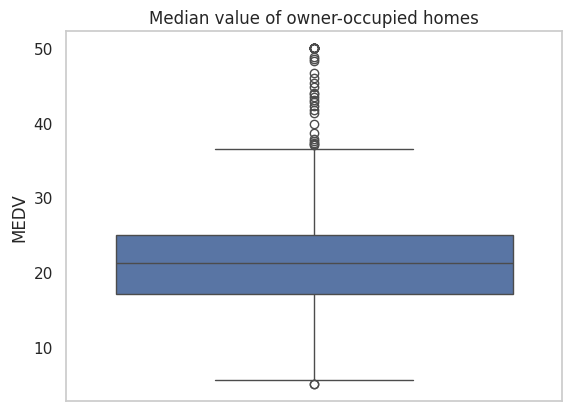

In [28]:
## 1. boxplot median value of owner-occupied homes
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Median value of owner-occupied homes')
ax.grid(False)
pyplot.show()

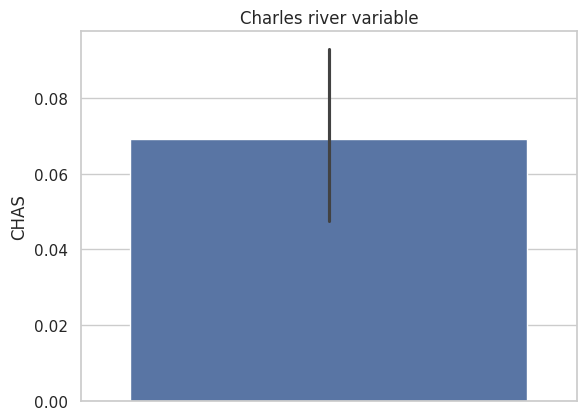

In [14]:
## 2. Provide a bar plot for the Charles river variable
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)
pyplot.title('Charles river variable')
pyplot.show()

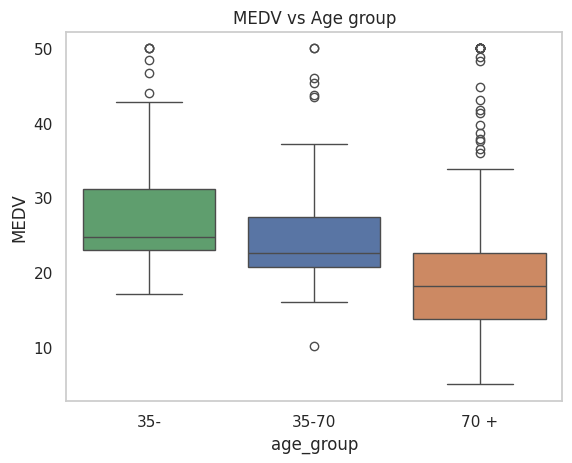

In [26]:
# 3. Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35-'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 +'

bp = sns.boxplot(x='age_group',y='MEDV', data=boston_df, hue = 'age_group', order =  ['35-','35-70','70 +'])
bp.grid(False)
pyplot.title('MEDV vs Age group')
pyplot.show()

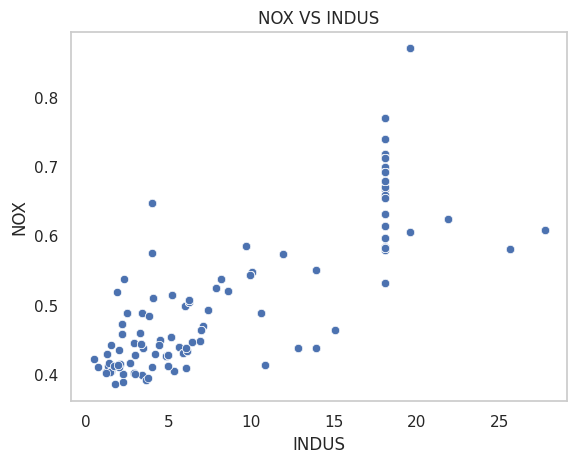

In [32]:
# 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the 
# proportion of non-retail business acres per town.What can you say about the relationship?
sp = sns.scatterplot(y='NOX', x='INDUS', data=boston_df)
sp.grid(False)
pyplot.title('NOX VS INDUS')

pyplot.show()

There is a positive relation between Nitric oxide concentrations and the  proportion of non-retail business acres per town 

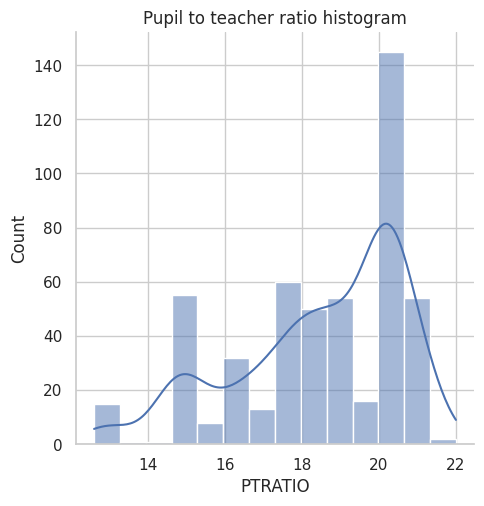

In [35]:
# 5. Create a histogram for the pupil to teacher ratio variable

dp = sns.displot(boston_df['PTRATIO'], kde = True)
pyplot.title('Pupil to teacher ratio histogram')
pyplot.show()


1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [42]:
# 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#H0 = el valor medio de las casas no difiere si esta al lado del rio o no.
#H1 = el valor medio de las casas si difiere si esta al lado del rio o no.

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 we can not assume equality of variance

In [44]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the p-value is less than 0.05 we can reject the null hypotesis, then there is statistical difference in the mean value of houses bounded by the Charles river or not

In [49]:
# 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# levene test for variance 
scipy.stats.levene(boston_df[boston_df['age_group'] == '35-']['MEDV'],
                   boston_df[boston_df['age_group'] == '35-70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 +']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, the variance are equal

In [50]:
#then we run de ANOVA test
lower = boston_df[boston_df['age_group'] == '35-']['MEDV']
between = boston_df[boston_df['age_group'] == '35-70']['MEDV']
greater = boston_df[boston_df['age_group'] == '70 +']['MEDV']

scipy.stats.f_oneway(lower, between, greater)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Since the p-value is less than 0.05, we can reject the null hypotesis, therefore there is statistical difference in the mean value of houses between the age groups

In [51]:
# 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail
# business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [58]:
# 4. What is the impact of an additional weighted distance to the five Boston employment centres on the  median value of owner occupied homes? (Regression analysis)
 # dependiente = MEDV
 # independiente = DIS

X = boston_df['DIS']  #weighted distance to the five Boston employment centres
y = boston_df['MEDV'] #median value of owner occupied homes
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        13:08:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since P value is less than 0.05, this coefficient is statistically significant. Therefore, the impact of an additional unit of weighted distance to the employment centres is an increase in the median value of owner-occupied homes by approximately 1.0916 units.